# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [ ]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [ ]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

print(insurance.shape)
insurance.head(5)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [ ]:
insurance.info()

insurance.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Define Features and Target

In [ ]:
from pandas.core.arrays import categorical
# TODO: Set numeric and categorical feature lists
numeric_features = ['age', 'bmi', 'children']

categorical_features = ['sex', 'smoker', 'region']
# TODO: Define target column

X = insurance[numeric_features + categorical_features]
y = insurance['charges']
# TODO: Display X head
X.head(5)
y.head()


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Train Test Split

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [ ]:
# Build preprocessing transformer
# Preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
    ]
)

# Pipeline
mlr_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("linreg", LinearRegression())
])

# Fit
mlr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [ ]:
# TODO: Complete function to print performance
def regression_metrices(y_train, y_train_pred, label='Model'):
  mae = mean_squared_error(y_train, y_train_pred)
  mse = mean_squared_error(y_train, y_train_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train, y_train_pred)

  print(f'=== {label} ====')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2)
  print()

## Evaluate Model

In [ ]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
regression_metrices(y_train, y_train_pred, "--- Linear Regression (Train) ---")
regression_metrices(y_test, y_test_pred, "--- Linear Regression (Test) ---")


=== --- Linear Regression (Train) --- ====
MAE:  37277681.70201866
RMSE:  6105.545160099847
R2 :  0.7417255854683333

=== --- Linear Regression (Test) --- ====
MAE:  33596915.851361446
RMSE:  5796.284659276272
R2 :  0.7835929767120724



## Inspect Coefficients

In [ ]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

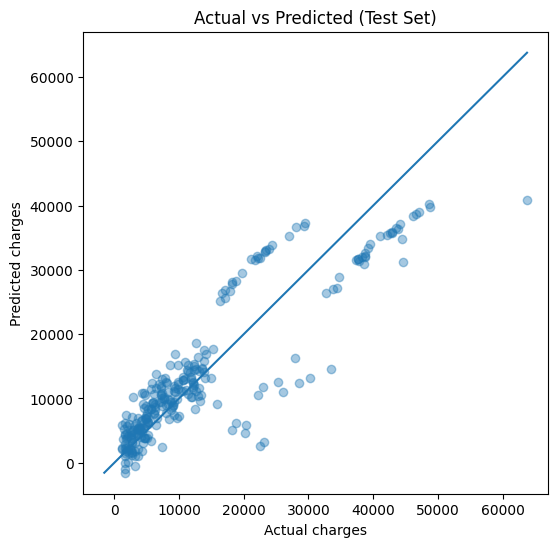

In [ ]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

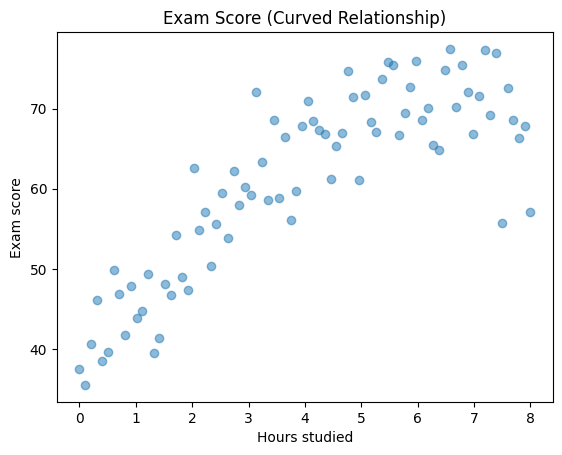

In [ ]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [ ]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [ ]:
# TODO: Create helper to fit polynomial model

def fit_poly(deg):
  results = []

  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])
  model.fit(X_train_h, y_train_h)

  y_train_h_pred = model.predict(X_train_h)
  y_test_h_pred = model.predict(X_test_h)

  mae_train = mean_absolute_error(y_train_h, y_train_h_pred)
  rmse_train = np.sqrt(mean_squared_error(y_train_h, y_train_h_pred))
  r2_score_train = r2_score(y_train_h, y_train_h_pred)

  mae_test = mean_absolute_error(y_test_h, y_test_h_pred)
  rmse_test = np.sqrt(mean_squared_error(y_test_h, y_test_h_pred))
  r2_score_test = r2_score(y_test_h, y_test_h_pred)

  return {
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_score_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_score_test,
  }


In [ ]:
# TODO: Fit models for degrees 1, 2, 3, 8
degrees = [1, 2, 3, 8]
performences = []

for deg in degrees:
  performences.append(fit_poly(deg))

ans = pd.DataFrame(performences)
ans

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,5.385102,6.627386,0.655538,3.666822,5.206104,0.794243
1,2,3.833707,4.824255,0.817477,3.518008,4.305022,0.859304
2,3,3.817058,4.601789,0.833923,3.382100,4.418552,0.851786
3,8,3.443779,4.346083,0.851867,4.151161,4.928777,0.815580


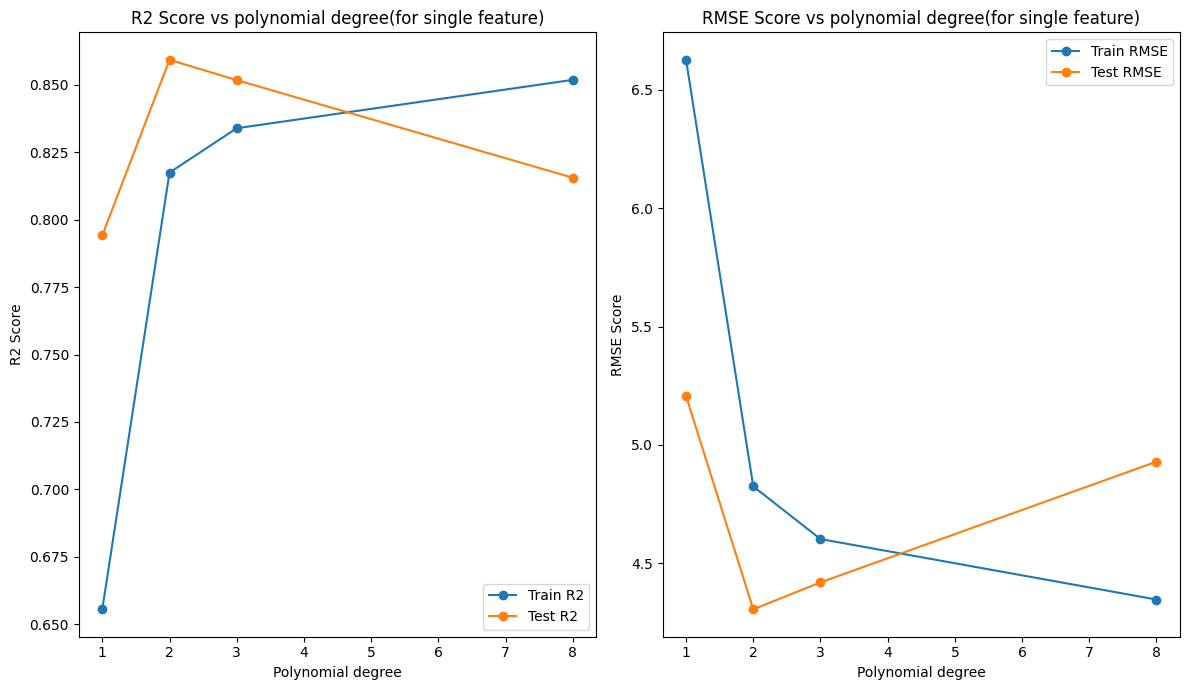

In [ ]:
# TODO: Plot fitted curves for each degree (R2,RMSE)

# Plot R squared and RMSE vs polynomial degree
fig, axes = plt.subplots(1,2, figsize=(12,7))


# R squared plot
axes[0].plot(ans['degree'], ans['R2_train'],marker='o',label='Train R2')
axes[0].plot(ans['degree'], ans['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree(for single feature)")
axes[0].legend()

# RMSE plot
axes[1].plot(ans['degree'], ans['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(ans['degree'], ans['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree(for single feature)")
axes[1].legend()

plt.tight_layout()
plt.show()


## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why?

   Ans: Polynomial degree 8 overfits because its rmse_train value increases in rmse_test.
2. Which degree gives best generalization?

    Ans: Degree 2 gives best generalization because it have the highest test r2 value and lowest rmse test value among all degree.
3. What you learned about MLR and polynomial regression?

    Ans: MLR assumes a linear relationship between features and target. Polynomial regression extendes MLR by adding non-linear polynomial tearms